Paul Mooney November 2017

**Identifying Simpsons Characters - Method Comparison
**

**Here I compare various different methods for identifying which Simpsons character is in a given image.
**

*It should be noted that this project (raw data + model fitting + data analysis) is completely self-contained 
within this Kaggle Kernel.  Due to the computational limitations of the Kaggle Kernel, I had to compress 
the photos from 512x512 to 64x64 pixels and I had to discard more than 75% of the data.  To improve these 
predictions, try using the full and uncompressed dataset while running the code on a more powerful machine.*


In [1]:

from PIL import Image, ImageFilter, ImageStat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy
import PIL
import os
#os.chdir('/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset')
os.chdir('/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset')




This is what the data looks like:

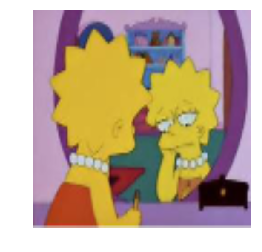

In [2]:
# Plot Image
%matplotlib inline
image_name = "/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_18.jpg" #Image to be used as query
def plotLisa(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotLisa(image_name)

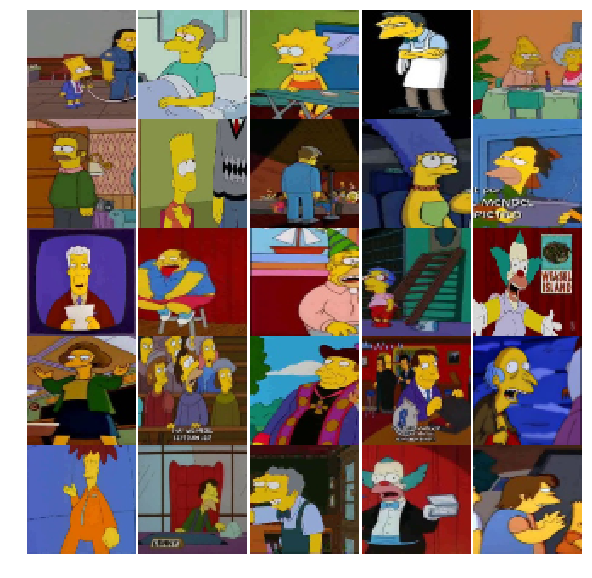

In [3]:
# Plot Multiple Images
simpsons = glob.glob('/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in simpsons[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (64, 64)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1



In [4]:
## Load and Compress/Resize Test Data
dict_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11:'lisa_simpson',
        12: 'marge_simpson', 13: 'mayor_quimby',14:'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}
def load_test_set(dirname,dict_characters):
    X_test = []
    Y_test = []
    for image_name in os.listdir(dirname):
        character_name = "_".join(image_name.split('_')[:-1])
        label = [label for label,character in dict_characters.items() if character == character_name][0]
        image = scipy.misc.imread(dirname+'/'+image_name)
        X_test.append(scipy.misc.imresize(image,(64,64),interp='lanczos'))
        Y_test.append(label)
    return np.array(X_test), np.array(Y_test)
X_test, Y_test = load_test_set("/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset", dict_characters) 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [5]:
# I will begin by working with the testing dataset only.
# Later I will load the training dataset as well.

X = X_test
y = Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:1000] 
Y_train = Y_train[0:1000]
X_test = X_test[0:1000] 
Y_test = Y_test[0:1000]

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)


Training Data Shape: (792, 64, 64, 3) (792, 64, 64, 3)
Testing Data Shape: (198, 64, 64, 3) (198, 64, 64, 3)


In [6]:
# Now try to classify

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold




# Make Data 1D for compatability with standard classifiers

X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_train = X_train.reshape(X_train.shape[0], X_trainShape)
X_test = X_test.reshape(X_test.shape[0], X_testShape)


In [7]:

#runLogisticRegression
def runLogisticRegression(a,b,c,d):
    """Run LogisticRegression w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('LogisticRegression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLogisticRegression(X_train, Y_train, X_test, Y_test)



LogisticRegression - Training set accuracy: 0.222368421053 (0.0718305369518)



There are 20 different characters.  If we were guessing by random chance, 
we should have about 5% accuracy.  Here we can see that a simple Logistic Regression
already can predict with approximately five times the accuracy of random chance.
Next I will evaluate the performance of some other classification algorithms.


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.222368 (0.071831)
RF: 0.162105 (0.084500)
KNN: 0.151579 (0.082012)
SVM: 0.060789 (0.049393)
LSVM: 0.197368 (0.066355)
GNB: 0.176316 (0.067185)
DTC: 0.156842 (0.085591)


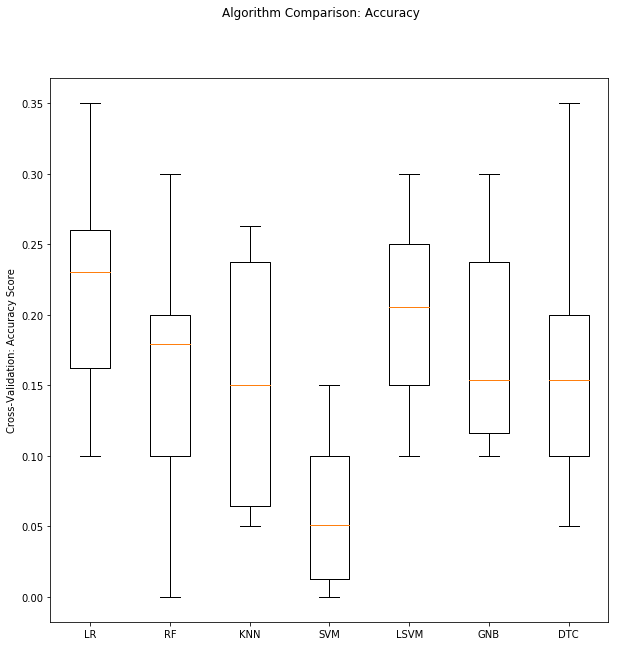


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [8]:

# Compare Performance of Classification Algorithms
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    #models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))       
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)  
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)


def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    #print('GBC = GradientBoostingClassifier')
    #print('LDA = LinearDiscriminantAnalysis')
    print('')
    return
defineModels()



These methods can perform more than four times better than random chance.
Eventually we will do much better.

Next I will try a variety of different types of neural networks.

In [9]:

# If we transform our data back to 2D we can use 2D convolutional neural networks.

X_test, Y_test = load_test_set("/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset", dict_characters) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [10]:

X = X_test
y = Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Reduce Sample Size for DeBugging 
X_train = X_train[0:1000] 
Y_train = Y_train[0:1000]
X_test = X_test[0:1000] 
Y_test = Y_test[0:1000]

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)


Training Data Shape: (792, 64, 64, 3) (792, 64, 64, 3)
Testing Data Shape: (198, 64, 64, 3) (198, 64, 64, 3)


In [11]:

import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json


# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 20)
Y_test = to_categorical(Y_test, num_classes = 20)


Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [12]:
import sklearn
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
def runKerasCNN(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 20
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    #print('Test loss:', score[0])
    print('')
    print('Keras CNN #1A - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    

runKerasCNN(X_train, Y_train,  X_test, Y_test)


Train on 792 samples, validate on 198 samples
Epoch 1/12
792/792 [==============================] - 17s - loss: 3.0618 - acc: 0.0556 - val_loss: 3.0081 - val_acc: 0.0606
Epoch 2/12
792/792 [==============================] - 17s - loss: 2.9797 - acc: 0.0707 - val_loss: 3.0260 - val_acc: 0.0606
Epoch 3/12
792/792 [==============================] - 17s - loss: 2.9505 - acc: 0.0896 - val_loss: 2.9674 - val_acc: 0.0859
Epoch 4/12
792/792 [==============================] - 17s - loss: 2.9142 - acc: 0.0997 - val_loss: 2.9788 - val_acc: 0.0707
Epoch 5/12
792/792 [==============================] - 17s - loss: 2.8535 - acc: 0.1237 - val_loss: 2.9752 - val_acc: 0.0707
Epoch 6/12
792/792 [==============================] - 17s - loss: 2.8369 - acc: 0.1351 - val_loss: 2.9384 - val_acc: 0.1364
Epoch 7/12
792/792 [==============================] - 17s - loss: 2.7522 - acc: 0.1679 - val_loss: 2.8354 - val_acc: 0.1667
Epoch 8/12
792/792 [==============================] - 17s - loss: 2.6844 - acc: 0.2146

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Our first neural network has ~25% accuracy, which is similar to the accuracy
when we used logistic regression.  We should be able to do better than this.
I will try to increase the accuracy by increasing the sample size a little bit. 
Beceause of the limitations of the Kaggle Kernel, however, I still will not be using the full dataset.

In [13]:
# In order to get better scores I will need to use all of the training data
# Before I was using only the testing data (split up into training and testing data)
# Now I will load the training data as well and I will start over.
# I now have a sample size of around 20,000 instead of 1,000, if I use the entier dataset.

# Load and Compress/Resize Test Data
dict_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11:'lisa_simpson',
        12: 'marge_simpson', 13: 'mayor_quimby',14:'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}
def load_test_set(dirname,dict_characters):
    X_test = []
    Y_test = []
    for image_name in os.listdir(dirname):
        character_name = "_".join(image_name.split('_')[:-1])
        label = [label for label,character in dict_characters.items() if character == character_name][0]
        image = scipy.misc.imread(dirname+'/'+image_name)
        X_test.append(scipy.misc.imresize(image,(64,64),interp='lanczos'))
        Y_test.append(label)
    return np.array(X_test), np.array(Y_test)
X_test, Y_test = load_test_set("/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset", dict_characters) 



from os import listdir
directory_name = "/kaggle/input/zipfiles/simpsons_dataset/simpsons_dataset"
#image_names = listdir(directory_name)
#image_names.remove('.DS_Store')
#image_names.remove('._.DS_Store')


# REMEMBER TO TURN OFF THE [0:50] BELOW WHEN WORKING WITH THE LARGER DATASET


def load_train_set(dirname,dict_characters):
   X_train = []
   Y_train = []
   for label,character in dict_characters.items():
       list_images = os.listdir(dirname+'/'+character)
       for image_name in list_images[0:150]:
           image = scipy.misc.imread(dirname+'/'+character+'/'+image_name)
           X_train.append(scipy.misc.imresize(image,(64,64),interp='lanczos'))
           Y_train.append(label)
   return np.array(X_train), np.array(Y_train)
X_train, Y_train = load_train_set("/kaggle/input/zipfiles/simpsons_dataset/simpsons_dataset", dict_characters)       
# Normalize the data
X_train = X_train / 255.0
# SKlearn scaled instead??
print("Train", X_train.shape, Y_train.shape)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train (3000, 64, 64, 3) (3000,)


In [14]:
# Now try to classify

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



In [15]:
# If we transform our data back to 2D we can use 2D convolutional neural networks.

X_test, Y_test = load_test_set("/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset", dict_characters) 
X_train, Y_train = load_train_set("/kaggle/input/zipfiles/simpsons_dataset/simpsons_dataset", dict_characters)       

# Reduce Sample Size for DeBugging 
X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:1000] 
Y_test = Y_test[0:1000]


# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)


# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 20)
Y_test = to_categorical(Y_test, num_classes = 20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Training Data Shape: (3000, 64, 64, 3) (3000, 64, 64, 3)
Testing Data Shape: (990, 64, 64, 3) (990, 64, 64, 3)


In [16]:

from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
def runKerasCNN(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 20
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    #print('Test loss:', score[0])
    print('')
    print('Keras CNN #1B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    

runKerasCNN(X_train, Y_train,  X_test, Y_test)


Train on 3000 samples, validate on 990 samples
Epoch 1/12
3000/3000 [==============================] - 69s - loss: 3.0854 - acc: 0.0513 - val_loss: 2.9928 - val_acc: 0.0838
Epoch 2/12
3000/3000 [==============================] - 70s - loss: 2.9914 - acc: 0.0540 - val_loss: 2.9864 - val_acc: 0.0394
Epoch 3/12
3000/3000 [==============================] - 69s - loss: 2.9862 - acc: 0.0550 - val_loss: 2.9890 - val_acc: 0.0505
Epoch 4/12
3000/3000 [==============================] - 70s - loss: 2.9769 - acc: 0.0623 - val_loss: 2.9711 - val_acc: 0.0798
Epoch 5/12
3000/3000 [==============================] - 69s - loss: 2.9615 - acc: 0.0690 - val_loss: 2.9505 - val_acc: 0.0879
Epoch 6/12
3000/3000 [==============================] - 68s - loss: 2.9448 - acc: 0.0820 - val_loss: 2.8901 - val_acc: 0.0899
Epoch 7/12
3000/3000 [==============================] - 69s - loss: 2.8467 - acc: 0.1243 - val_loss: 2.7386 - val_acc: 0.1788
Epoch 8/12
3000/3000 [==============================] - 68s - loss: 2.7

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))


Great!  We got the accuracy to ~60% (for identifying each of twenty different Simpsons characters).
This is a big improvement over the ~25% accuracy that we were getting earlier with the smaller sample size.  
Next I will experiment with different architectures for my neural networks in the hopes of finding one
that works well with this dataset so that we can get an even higher accuracy score.

In [17]:
# Now let's try a slightly different 2D convolutional NN architecture



def runAnotherKeras(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 20
    epochs = 12
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(a,b,
                  batch_size=batch_size,
                  verbose=1,
                  epochs=epochs,
                  validation_data=(c,d))
    score = model.evaluate(c,d, verbose=0)
        
        #print('Test loss:', score[0])
    print('')
    print('Keras CNN #2 - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    


runAnotherKeras(X_train, Y_train, X_test, Y_test)

Train on 3000 samples, validate on 990 samples
Epoch 1/12
3000/3000 [==============================] - 119s - loss: 3.5386 - acc: 0.1620 - val_loss: 2.9951 - val_acc: 0.0717
Epoch 2/12
3000/3000 [==============================] - 118s - loss: 2.3103 - acc: 0.3467 - val_loss: 3.0634 - val_acc: 0.0556
Epoch 3/12
3000/3000 [==============================] - 120s - loss: 1.9148 - acc: 0.4460 - val_loss: 3.0077 - val_acc: 0.0929
Epoch 4/12
3000/3000 [==============================] - 99s - loss: 1.5195 - acc: 0.5680 - val_loss: 2.9319 - val_acc: 0.1293
Epoch 5/12
3000/3000 [==============================] - 92s - loss: 1.2288 - acc: 0.6367 - val_loss: 3.1029 - val_acc: 0.1000
Epoch 6/12
3000/3000 [==============================] - 92s - loss: 0.9434 - acc: 0.7053 - val_loss: 3.7722 - val_acc: 0.0586
Epoch 7/12
3000/3000 [==============================] - 92s - loss: 0.7912 - acc: 0.7583 - val_loss: 2.9176 - val_acc: 0.1606
Epoch 8/12
3000/3000 [==============================] - 92s - loss: 

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))


That particular neural network architecture performed worse (~20% accuracy).
I will try to improve the accuracy by adding in a data augmentation step.




In [18]:
# Now I will try to improve the accuracy by adding in a data augmentation step.
# Now I will try a slightly different NN architecture with the data augmentation step.


def runAnotherKerasAugmented(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 20
    epochs = 12
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
   
runAnotherKerasAugmented(X_train, Y_train, X_test, Y_test)

Epoch 1/12
94/93 [==============================] - 95s - loss: 3.5175 - acc: 0.1534    
Epoch 2/12
94/93 [==============================] - 95s - loss: 2.6977 - acc: 0.2566    
Epoch 3/12
94/93 [==============================] - 93s - loss: 2.4226 - acc: 0.3219    
Epoch 4/12
94/93 [==============================] - 94s - loss: 2.1977 - acc: 0.3754    
Epoch 5/12
94/93 [==============================] - 94s - loss: 1.9463 - acc: 0.4543    
Epoch 6/12
94/93 [==============================] - 95s - loss: 1.7937 - acc: 0.4963    
Epoch 7/12
94/93 [==============================] - 94s - loss: 1.6504 - acc: 0.5320    
Epoch 8/12
94/93 [==============================] - 94s - loss: 1.5806 - acc: 0.5581    
Epoch 9/12
94/93 [==============================] - 97s - loss: 1.5117 - acc: 0.5796    
Epoch 10/12
94/93 [==============================] - 97s - loss: 1.3994 - acc: 0.6041    
Epoch 11/12
94/93 [==============================] - 99s - loss: 1.4080 - acc: 0.6097    
Epoch 12/12
94/93 [

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))


Now the accuracy is nearly 70%, which is a big improvement over the 
30% accuracy that we had prior to the data augmentation.

70% accuracy is our best result yet!

 I will try using yet another different neural network architecture in the hopes 
 of possibily improving the performance.

In [ ]:
# Now I will try another 2D-Convolutional Neural Network, this time with 6 convolutions
# The hope is that this new architecture will help give us better accuracy.

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
import sklearn



def create_model_six_conv(input_shape):
    """
    CNN Keras model with 6 convolutions.
    :param input_shape: input shape, generally X_train.shape[1:]
    :return: Keras model, RMS prop optimizer
    """
    batch_size = 128
    num_classes = 20
    epochs = 12
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    #num_classes = len(map_characters)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #return model, opt

#def load_model_from_checkpoint(weights_path, input_shape=(pic_size,pic_size,3)):
    #model, opt = create_model_six_conv(input_shape)
    #model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    #return model

    model.fit(X_train,Y_train,
                  batch_size=batch_size,
                  verbose=1,
                  epochs=epochs,
                  validation_data=(X_test,Y_test))
    score = model.evaluate(X_test,Y_test, verbose=0)
        
        #print('Test loss:', score[0])
    print('')
    print('Keras CNN #3 - accuracy:', score[1])
    print('')
    
    
    
    
    y_pred = model.predict(X_test)
    
    print('\n', sklearn.metrics.classification_report(np.where(Y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

    
create_model_six_conv(X_train.shape[1:])


Train on 3000 samples, validate on 990 samples
Epoch 1/12
3000/3000 [==============================] - 114s - loss: 2.9971 - acc: 0.0510 - val_loss: 2.9948 - val_acc: 0.0586
Epoch 2/12
3000/3000 [==============================] - 113s - loss: 2.9952 - acc: 0.0567 - val_loss: 2.9930 - val_acc: 0.0808
Epoch 3/12
3000/3000 [==============================] - 111s - loss: 2.9916 - acc: 0.0623 - val_loss: 2.9878 - val_acc: 0.0758
Epoch 4/12
3000/3000 [==============================] - 113s - loss: 2.9799 - acc: 0.0830 - val_loss: 2.9598 - val_acc: 0.1394
Epoch 5/12
3000/3000 [==============================] - 113s - loss: 2.9107 - acc: 0.1183 - val_loss: 2.7788 - val_acc: 0.1657
Epoch 6/12
3000/3000 [==============================] - 113s - loss: 2.7689 - acc: 0.1520 - val_loss: 2.7227 - val_acc: 0.1788
Epoch 7/12
3000/3000 [==============================] - 113s - loss: 2.6693 - acc: 0.1733 - val_loss: 2.6353 - val_acc: 0.2121
Epoch 8/12
3000/3000 [==============================] - 114s - l

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This approach gave us an accuracy of ~40% .
Once again, I will try using data augmentation to improve the score. 

In [ ]:


# Now let's try to increase the score by using data augmentation with a slightly different NN architecture

def kerasAugmentation(a,b,c,d):

    img_rows, img_cols = 64,64
    input_shape = (img_rows, img_cols, 3)
    batch_size = 128
    num_classes = 20
    epochs = 12
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
        #num_classes = len(map_characters)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        #return model, opt

    #def load_model_from_checkpoint(weights_path, input_shape=(pic_size,pic_size,3)):
        #model, opt = create_model_six_conv(input_shape)
        #model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        #return model

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)

            #print('Test loss:', score[0])
    print('')
    print('Keras CNN #3B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)

    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')
kerasAugmentation(X_train, Y_train, X_test, Y_test)

Epoch 1/12
94/93 [==============================] - 124s - loss: 2.9993 - acc: 0.0396   
Epoch 2/12
94/93 [==============================] - 119s - loss: 2.9638 - acc: 0.0740   
Epoch 3/12
94/93 [==============================] - 119s - loss: 2.8295 - acc: 0.1329   
Epoch 4/12
94/93 [==============================] - 120s - loss: 2.7424 - acc: 0.1539   
Epoch 5/12
94/93 [==============================] - 119s - loss: 2.6984 - acc: 0.1621   
Epoch 6/12
94/93 [==============================] - 121s - loss: 2.6517 - acc: 0.1780   
Epoch 7/12
94/93 [==============================] - 115s - loss: 2.6001 - acc: 0.1871   
Epoch 8/12
94/93 [==============================] - 116s - loss: 2.5435 - acc: 0.2072   
Epoch 9/12
94/93 [==============================] - 139s - loss: 2.4390 - acc: 0.2440   
Epoch 10/12
94/93 [==============================] - 139s - loss: 2.2721 - acc: 0.3026   
Epoch 11/12
94/93 [==============================] - 139s - loss: 2.0923 - acc: 0.3723   
Epoch 12/12
94/93 [

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))


With data augmentation we improved the accuracy from ~40% to ~50%.

Previously we had identified a neural network that performed with
approximately 50% accuracy prior to data augmentation.  Here I will
test how that model performs after data augmentation.


In [ ]:
# Now I will try data augmentation again but with a different NN architecture

def runKerasCNNAugment(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 20
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)

            #print('Test loss:', score[0])
    print('')
    print('Keras CNN #1C - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
    
    
    score = model.evaluate(x_test, y_test, verbose=0)
    

runKerasCNNAugment(X_train, Y_train,  X_test, Y_test)


Epoch 1/12
94/93 [==============================] - 61s - loss: 2.9926 - acc: 0.0685    
Epoch 2/12
94/93 [==============================] - 60s - loss: 2.7990 - acc: 0.1632    
Epoch 3/12
94/93 [==============================] - 61s - loss: 2.5785 - acc: 0.2412    
Epoch 4/12
94/93 [==============================] - 61s - loss: 2.4253 - acc: 0.2929    
Epoch 5/12
94/93 [==============================] - 64s - loss: 2.3096 - acc: 0.3349    
Epoch 6/12
94/93 [==============================] - 67s - loss: 2.1664 - acc: 0.3769    
Epoch 7/12
94/93 [==============================] - 68s - loss: 2.0673 - acc: 0.4049    
Epoch 8/12
94/93 [==============================] - 69s - loss: 2.0081 - acc: 0.4116    
Epoch 9/12
94/93 [==============================] - 68s - loss: 1.9294 - acc: 0.4439    
Epoch 10/12
94/93 [==============================] - 68s - loss: 1.8800 - acc: 0.4565    
Epoch 11/12
94/93 [==============================] - 68s - loss: 1.8125 - acc: 0.4740    
Epoch 12/12
94/93 [

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))



                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.48      0.50      0.49        48
  apu_nahasapeemapetilon       0.54      0.90      0.68        50
            bart_simpson       0.45      0.20      0.28        50
charles_montgomery_burns       0.66      0.48      0.55        48
            chief_wiggum       0.54      0.78      0.64        50
          comic_book_guy       0.64      0.51      0.57        49
          edna_krabappel       0.67      0.56      0.61        50
           homer_simpson       0.58      0.14      0.23        50
           kent_brockman       0.66      0.76      0.70        50
        krusty_the_clown       0.66      0.84      0.74        50
            lisa_simpson       0.58      0.66      0.62        50
           marge_simpson       0.33      0.36      0.35        50
     milhouse_van_houten       0.66      0.84      0.74        50
             moe_szyslak       0.69      0.80      0.74        50
        

For this model, the accuracy improved from ~50% to ~60% after data augmentation.

Our best performance, however, was the model that performed at 70% accuracy.
Next I will plot a confusion matrix for that best performing model.

Epoch 1/16
94/93 [==============================] - 93s - loss: 3.5932 - acc: 0.1452    
Epoch 2/16
94/93 [==============================] - 94s - loss: 2.7303 - acc: 0.2416    
Epoch 3/16
94/93 [==============================] - 109s - loss: 2.3964 - acc: 0.3337   
Epoch 4/16
94/93 [==============================] - 108s - loss: 2.1883 - acc: 0.3913   
Epoch 5/16
94/93 [==============================] - 108s - loss: 1.9543 - acc: 0.4405   
Epoch 6/16
94/93 [==============================] - 110s - loss: 1.8120 - acc: 0.4918   
Epoch 7/16
94/93 [==============================] - 110s - loss: 1.6781 - acc: 0.5147   
Epoch 8/16
94/93 [==============================] - 110s - loss: 1.6220 - acc: 0.5496   
Epoch 9/16
94/93 [==============================] - 97s - loss: 1.5137 - acc: 0.5666    
Epoch 10/16
94/93 [==============================] - 92s - loss: 1.4282 - acc: 0.5908    
Epoch 11/16
94/93 [==============================] - 94s - loss: 1.3741 - acc: 0.6227    
Epoch 12/16
94/93 [

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 18
  .format(len(labels), len(target_names))



                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.43      0.71      0.54        48
  apu_nahasapeemapetilon       0.95      0.78      0.86        50
            bart_simpson       0.51      0.46      0.48        50
charles_montgomery_burns       0.72      0.65      0.68        48
            chief_wiggum       0.95      0.72      0.82        50
          comic_book_guy       0.84      0.53      0.65        49
          edna_krabappel       0.83      0.76      0.79        50
           homer_simpson       0.49      0.34      0.40        50
           kent_brockman       0.70      0.86      0.77        50
        krusty_the_clown       1.00      0.68      0.81        50
            lisa_simpson       0.78      0.72      0.75        50
           marge_simpson       0.39      0.66      0.49        50
     milhouse_van_houten       0.86      0.86      0.86        50
             moe_szyslak       0.89      0.82      0.85        50
        

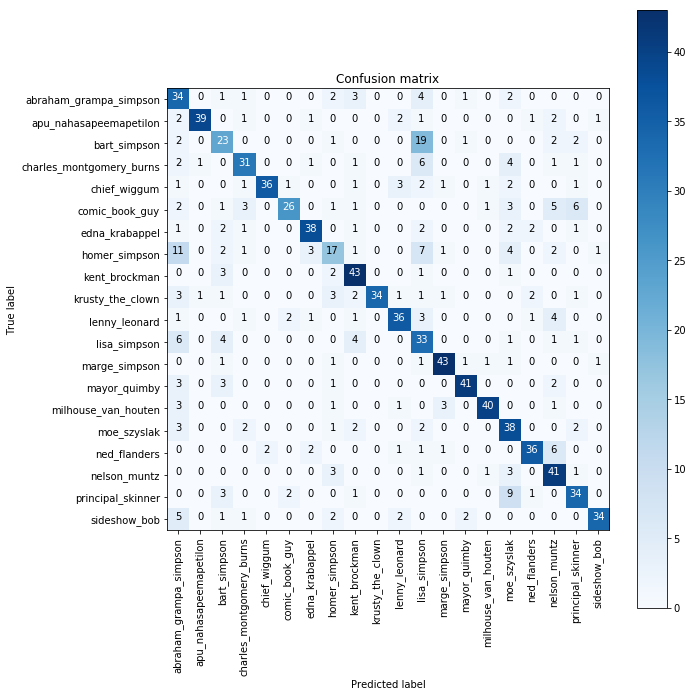

In [ ]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



def runAnotherKerasAugmentedConfusion(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 20
    epochs = 16
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
   

    # Predict the values from the validation dataset
    Y_pred = model.predict(X_test)
    # Convert hot vectors prediction results to list of classes
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert hot vectors validation observations to list of classes
    Y_true = np.argmax(Y_test,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 

runAnotherKerasAugmentedConfusion(X_train, Y_train, X_test, Y_test)    
    
    
    
    
    
    



**Great!  In the end, we were able to identify which of the twenty Simpsons characters
were present in each given image and we were able to do this with approximately 70% accuracy.
**


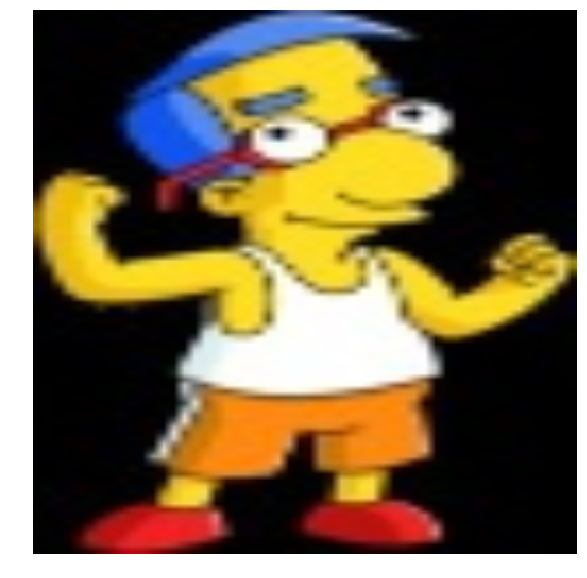

In [ ]:
image_name = "/kaggle/input/zipfiles/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_46.jpg" #Image to be used as query
def plotMilhouse(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotMilhouse(image_name)

It should be noted that this project (raw data + model fitting + data analysis) is completely self-contained 
within this Kaggle Kernel.  Due to the computational limitations of the Kaggle Kernel, I had to compress 
the photos from 512x512 to 64x64 pixels and I had to discard more than 75% of the data.  To improve these 
predictions, try using the full and uncompressed dataset while running the code on a more powerful machine.